In [1]:
from pyiron_workflow import Workflow
import numpy as np

We can create complex, branching graphs - consider a function with two outputs: 

In [2]:
# Writing a function is as simple as decorating it with @Workflow.wrap.as_function_node()
@Workflow.wrap.as_function_node()
def AddOne(x):
    y = x + 1
    return y

@Workflow.wrap.as_function_node()
def ArbitraryFunction_TwoOutputs(x):
    a = x+1
    b = x-1
    return a, b


In [3]:
random_value = np.random.random()

wf = Workflow("branched_wf")

wf.original_node = AddOne(random_value)
wf.node_with_two_outputs = ArbitraryFunction_TwoOutputs(wf.original_node.outputs.y)
wf.first_branch_first_node = AddOne(wf.node_with_two_outputs.outputs.a)
wf.second_branch_first_node = AddOne(wf.node_with_two_outputs.outputs.b)
wf.second_branch_second_node = AddOne(wf.second_branch_first_node.outputs.y)

wf.run()
# This will print the end outputs of each branch

{'first_branch_first_node__y': 3.4956441965579,
 'second_branch_second_node__y': 2.4956441965579}

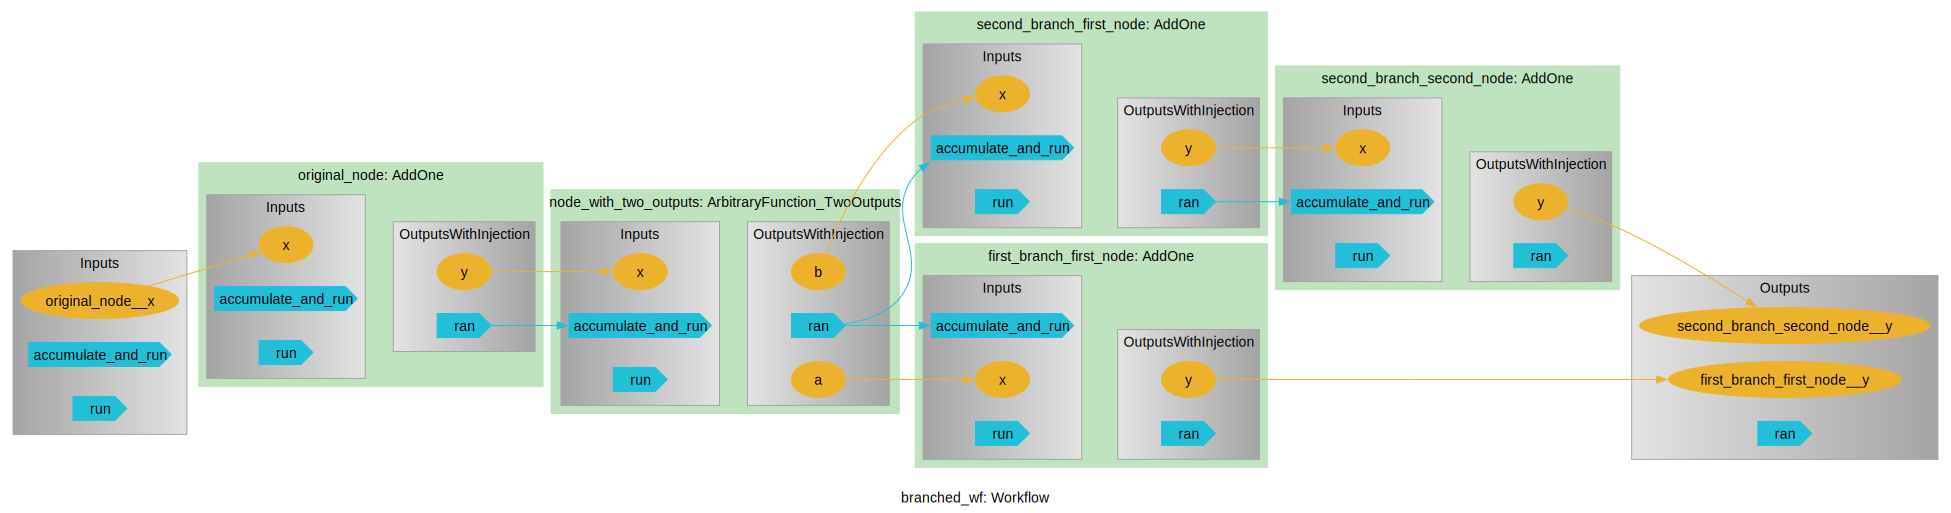

In [4]:
wf.draw()

And now you can see how we pyiron_workflow can create complex branching workflows from here 

In the following notebooks, we will explore more complex looped nodes (e.g. for, while) and how pyiron_workflow handles them.